<a href="https://colab.research.google.com/github/Dshivank/EDA-Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> GLOBAL TERRORISM DATABASE </b>


## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

## <b> 1.  Getting the data ready for Classification </b>


In [ ]:
# We will start with importing some important libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [ ]:
# Mounting the Drive
 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the required data from the drive

file_path = "/content/drive/MyDrive/Global Terrorism Data.csv"
terrorism_data = pd.read_csv(file_path, encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Checking the data with the head method
 
terrorism_data.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [ ]:
# Checking the columns available in the dataset 

terrorism_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
# checking the shape of the dataset

terrorism_data.shape

(181691, 135)

In [ ]:
# By the info method we can check the Nan values and the datatype of all the columns in our dataset

terrorism_data.info(verbose= True, null_counts = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

## <b> 2. Cleaning the data

In [ ]:
# Now we have created a new dataset (i.e terrorism_data_new) where we will keep only the columns which we need for the analysis

terrorism_data_new = terrorism_data[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city','latitude', 'longitude', 'success', 'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'ransom']]

In [ ]:
# Checking our new updated dataframe

terrorism_data_new.head(2)

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,ransom
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,1.0


In [ ]:
# Now checking the shape of the new dataframe

terrorism_data_new.shape

(181691, 16)

In [ ]:
# Now we will rename our columns in the new dataframe

terrorism_data_new = terrorism_data_new.rename(columns= {'iyear' : 'year','imonth' : 'month', 'iday' : 'day', 'country_txt' : 'country', 'region_txt' : 'region', 'provstate' : 'state', 'attacktype1_txt' : 'attack_type', 'targtype1_txt' : 'target_type', 'gname' : 'gang_name', 'weaptype1_txt' : 'weapon_type', 'nkill' : 'no_of_kills'  })

In [ ]:
# Checking that the columns are renamed

terrorism_data_new.head(2)

,year,month,day,country,region,state,city,latitude,longitude,success,attack_type,target_type,gang_name,weapon_type,no_of_kills,ransom
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,1.0


In [ ]:
# Now we will check the info of the new dataset

terrorism_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   region       181691 non-null  object 
 5   state        181270 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   success      181691 non-null  int64  
 10  attack_type  181691 non-null  object 
 11  target_type  181691 non-null  object 
 12  gang_name    181691 non-null  object 
 13  weapon_type  181691 non-null  object 
 14  no_of_kills  171378 non-null  float64
 15  ransom       77381 non-null   float64
dtypes: float64(4), int64(4), object(8)
memory usage: 22.2+ MB


In [ ]:
# Handeling the Nan values using the fillna method
 
terrorism_data_new['state'] = terrorism_data_new['state'].fillna('unknown')
terrorism_data_new['city'] = terrorism_data_new['city'].fillna('unknown')
terrorism_data_new['no_of_kills'] = terrorism_data_new['no_of_kills'].fillna(0)


In [ ]:
# checking for the Nan values

terrorism_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   region       181691 non-null  object 
 5   state        181691 non-null  object 
 6   city         181691 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   success      181691 non-null  int64  
 10  attack_type  181691 non-null  object 
 11  target_type  181691 non-null  object 
 12  gang_name    181691 non-null  object 
 13  weapon_type  181691 non-null  object 
 14  no_of_kills  181691 non-null  float64
 15  ransom       77381 non-null   float64
dtypes: float64(4), int64(4), object(8)
memory usage: 22.2+ MB


In [ ]:
# Now we will check the sum of the Nan values present in all of the columns

terrorism_data_new.isnull().sum()


year                0
month               0
day                 0
country             0
region              0
state               0
city                0
latitude         4556
longitude        4557
success             0
attack_type         0
target_type         0
gang_name           0
weapon_type         0
no_of_kills         0
ransom         104310
dtype: int64

## <b> 3. Exploratory Data Analysis </b>

## <b> Visualising the hot zones under attack over the world *******

In [ ]:
import json
#import country_converter as coco
from datetime import datetime, timedelta
import requests
import pandas as pd
#import geopandas as gpd
import matplotlib.pyplot as plt


## <b> Total number of attacks in every year by region


In [ ]:
attacks_per_year = terrorism_data_new.groupby(['year', 'region']).count().unstack()['country']
attacks_per_year

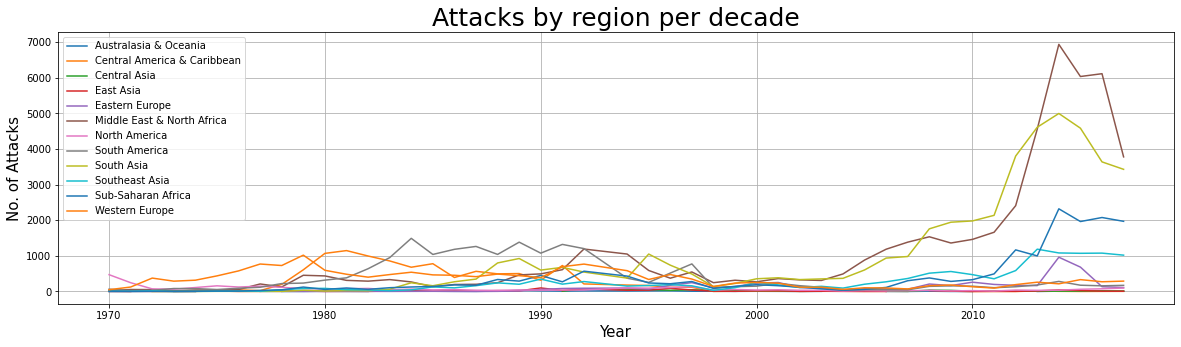

In [ ]:
# Plotting the Multiline Chart (subplot by decade)
attacks_per_year.plot(grid = True)

# Set a title of the chart.
plt.title('Attacks by region per decade', fontsize = 25)

# Set the x and y axis labels
plt.ylabel('No. of Attacks', fontsize = 15)
plt.xlabel('Year', fontsize = 15)

# Setting the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# show a legend on the plot
plt.legend()

## <b> Analysing the trend across the year

In [ ]:
yearly_trend = terrorism_data_new.year.value_counts().sort_index(ascending=True)

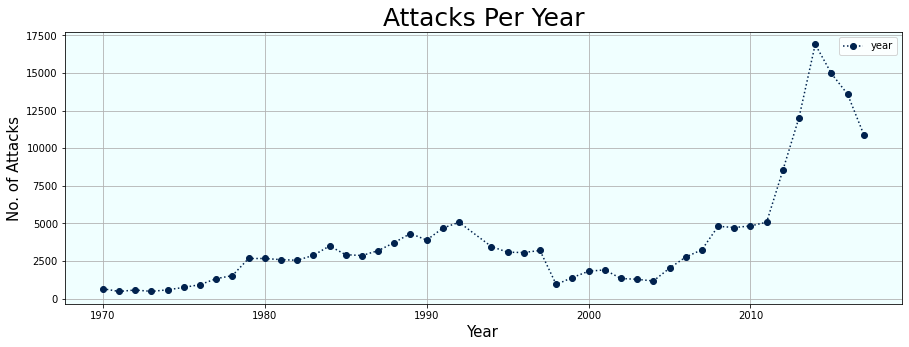

In [ ]:
# Plotting the line Chart to show the trend.
yearly_trend.plot(kind = 'line', marker = 'o', ls = ':', grid = True, colormap = "cividis").patch.set_facecolor('#f0ffff')

# Set a title of the chart.
plt.title('Attacks Per Year', fontsize = 25)

# Set the x and y axis labels
plt.ylabel('No. of Attacks', fontsize = 15)
plt.xlabel('Year', fontsize = 15)

# Setting the figure size
plt.rcParams['figure.figsize'] = (15, 5)

# show a legend on the plot
plt.legend()

# Display a figure.
plt.show()

## <b> In the above graph it is visible that for year 2014 their where most terrorist attack so analysing which region got attacked most

In [ ]:
attacks_in_2014 = terrorism_data_new[terrorism_data_new['year'] == 2014]
attack_2014 = attacks_in_2014['region'].value_counts().to_frame()

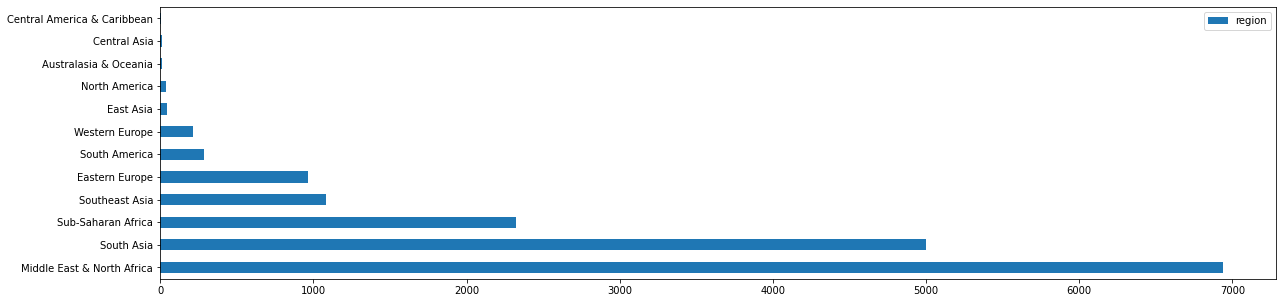

In [ ]:
attack_2014.plot(kind = 'barh')